In [23]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.4.0'

In [4]:
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

#### Splitting training set into training and validation sets
#### Scaling the pixels between 0 and 1 by dividing them by 255

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#### Giving class names to 10 labels

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating an MLP classifier with two hidden layers 

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))  ## input layer with Flatten to convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation = 'relu'))  ## first hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation = 'relu'))  ## first hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation = 'softmax'))  ## output layer with 10 neurons for each class

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Once the model is created, we need to call compile() to specify loss function and optimizer

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0673 - accuracy: 0.9781 - val_loss: 0.3902 - val_accuracy: 0.8944
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9774 - val_loss: 0.3592 - val_accuracy: 0.8956
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0644 - accuracy: 0.9782 - val_loss: 0.3959 - val_accuracy: 0.8888
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9783 - val_loss: 0.4356 - val_accuracy: 0.8892
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0617 - accuracy: 0.9797 - val_loss: 0.4414 - val_accuracy: 0.8784
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0618 - accuracy: 0.9794 - val_loss: 0.3853 - val_accuracy: 0.8970
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0604 - accuracy: 0.9805 - val_loss: 0.3870 - val_accuracy:

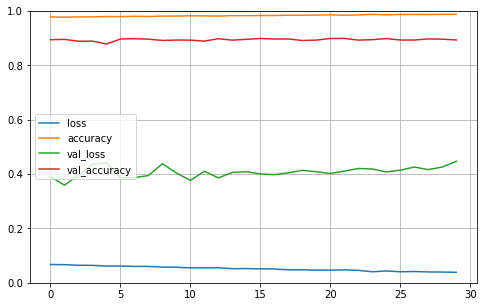

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Once we have a good model, we should evaluate it on the test set

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 143.1595 - accuracy: 0.8332


[143.15953063964844, 0.8331999778747559]

#### Predicting -

In [31]:
X_new = X_test[:3]

## Predicting probabilities
y_proba = model.predict(X_new)
print('---------- Probabilities ----------')
print(y_proba.round(2))

## Predicting class
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('\n---------- Class ----------')
print(y_pred)

## Predicting defined class name
print('\n---------- Class name ----------')
print(np.array(class_names)[y_pred])

## Actual value
print('\n---------- Actual value ----------')
print(y_test[:3])

---------- Probabilities ----------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

---------- Class ----------
[9 2 1]

---------- Class name ----------
['Ankle boot' 'Pullover' 'Trouser']

---------- Actual value ----------
[9 2 1]
